In [264]:
import matplotlib.pyplot as plt
import numpy as np
import math as m
import scipy as sci
from sklearn.linear_model import LinearRegression
from os import listdir
import pandas as pd
import os
import glob

In [265]:
# rename dat files
n_ = [i for i in listdir('./files/') if '.dat' in i if 'dla_mode_n' in i]
s_ = [i for i in listdir('./files/') if '.dat' in i if 'dla_mode_s' in i]
name = [f'dla_mode_n_ts_{10**(int(i/26))}_nb_10000_seed_{i}_.dat' for i in range(5,105,5)]
name_ = [f'dla_n_mode_{10**(int(i/26))}_{int(i/5%5)}.dat' for i in range(5,105,5)]
print(name_)

for i,j in zip(name,name_):
   os.rename('./files/'+i,'./files/n/'+j)

['dla_n_mode_1_1.dat', 'dla_n_mode_1_2.dat', 'dla_n_mode_1_3.dat', 'dla_n_mode_1_4.dat', 'dla_n_mode_1_0.dat', 'dla_n_mode_10_1.dat', 'dla_n_mode_10_2.dat', 'dla_n_mode_10_3.dat', 'dla_n_mode_10_4.dat', 'dla_n_mode_10_0.dat', 'dla_n_mode_100_1.dat', 'dla_n_mode_100_2.dat', 'dla_n_mode_100_3.dat', 'dla_n_mode_100_4.dat', 'dla_n_mode_100_0.dat', 'dla_n_mode_1000_1.dat', 'dla_n_mode_1000_2.dat', 'dla_n_mode_1000_3.dat', 'dla_n_mode_1000_4.dat', 'dla_n_mode_1000_0.dat']


FileNotFoundError: [Errno 2] No such file or directory: './files/dla_mode_n_ts_1_nb_10000_seed_5_.dat' -> './files/n/dla_n_mode_1_1.dat'

In [266]:
def extend_fibers(fname):    
    print('extending ', fname)
    fout = fname.replace('dla_','').replace('/n','/particles')
    with open (fout, "w") as fid:
        with open(fname, 'r') as fid2:
            for row in fid2:
                if 'uid:' in row:
                    row = row.split()
                    id = int(row[1])
                    x = int(row[2])
                    y = int(row[3])
                    z = int(row[4])
                    for i in range(0,18):
                        fid.write('uid %d %d %d %d\n' %(id, x, y+i, z))

wdir = './files/n/'
for fname in os.listdir(wdir):
    extend_fibers(os.path.join(wdir, fname))

extending  ./files/n/dla_n_mode_10_3.dat
extending  ./files/n/dla_n_mode_1000_2.dat
extending  ./files/n/dla_n_mode_100_3.dat
extending  ./files/n/dla_n_mode_10_2.dat
extending  ./files/n/dla_n_mode_100_2.dat
extending  ./files/n/dla_n_mode_100_4.dat
extending  ./files/n/dla_n_mode_100_0.dat
extending  ./files/n/dla_n_mode_1000_4.dat
extending  ./files/n/dla_n_mode_1_1.dat
extending  ./files/n/dla_n_mode_1_2.dat
extending  ./files/n/dla_n_mode_10_0.dat
extending  ./files/n/dla_n_mode_1_0.dat
extending  ./files/n/dla_n_mode_1000_0.dat
extending  ./files/n/dla_n_mode_100_1.dat
extending  ./files/n/dla_n_mode_10_4.dat
extending  ./files/n/dla_n_mode_1000_3.dat
extending  ./files/n/dla_n_mode_1_3.dat
extending  ./files/n/dla_n_mode_1000_1.dat
extending  ./files/n/dla_n_mode_1_4.dat
extending  ./files/n/dla_n_mode_10_1.dat


In [325]:
def mass_center(fname):
    y = []
    with open(fname, 'r') as fid:
        for row in fid:
            row = row.split()
            y.append(int(row[3]))
    yc, counts = np.unique(y, return_counts=True)    
    fiber_length = np.max(yc) - np.min(yc)
    # y of mass center
    yc0 = sorted(zip(yc, counts), key=lambda u: u[1], reverse=True)[0]
    #print(yc0)

    return yc , counts, yc0[0], fiber_length

def transversal_section(fname, yc0):
    x, z = [], []
    with open(fname, 'r') as fid:
        for row in fid:
            row = row.split()
            y = int(row[3])
            if y == yc0:
                #print('entrou')
                #print(int(row[2]))
                x.append(int(row[2]))
                z.append(int(row[4]))

    xc, zc = np.mean(x), np.mean(z)
    #print(x)
    #print(z)
    radius = np.max([np.sqrt(((x[i]-xc)**2) + ((z[i]-zc)**2)) for i in range(len(x))])
    #radius = np.max(radius)
    print(radius)
    return x, z, xc, zc, radius

def fractal(Radius,x,z,xcent,zcent,arquivo):
    ## frac dimension 
    n = 100
    radius = np.linspace(5,Radius,n)
    cont = np.zeros(n)
    for j in range(0,len(radius)):
        c = 0
        for i in range(0,len(x)):
            ri = m.sqrt(((x[i]-xcent) **2) + ((z[i]-zcent)**2))
            if ri <= radius[j]:
                c += 1
                cont[j] = c
    #radius = 0
    occup = float(len(x))
    A = float(np.pi*(Radius**2))
    densitty = float(occup/A * 100)
    print("massa: %f" % occup)
    print("Area: %f" %A)
    print("Densidade %.2f" % densitty)
    #print(radius)
    vmin = np.log(radius[0])
    vmax = np.log(radius[-1])
    radius = np.log(radius).reshape(-1,1)
    cont = np.log(cont).reshape(-1,1)
    j, R = 0, 0
    for i in range(10,len(radius)):
        reg = LinearRegression().fit(radius[:i], cont[:i])
        r2 = reg.score(radius[:i], cont[:i])
        if(r2 > R):     
            R = r2
            j = i
        #Y = reg.coef_*v[:i] + reg.intercept_
    reg = LinearRegression().fit(radius[:j], cont[:j])
    print(reg.coef_,reg.intercept_)
    #print(v[-1][0])
    Y = reg.coef_*np.array([vmin,vmax]) + reg.intercept_
    plt.figure(figsize = (8,8))
    plt.plot(radius, cont, 'o--',color='darkslategray')
    plt.xlabel('log R (lattices units)')
    plt.ylabel('log m (ocuppied lattices units)')
    plt.plot(np.array([vmin,vmax]), Y[0], '--',color='darkred', label = "d_f = {:.2f}".format(reg.coef_[0][0]))
    plt.legend()
    plt.savefig("./img/"+arquivo[18:-3] + 'jpg', dpi=400)
    #plt.show()

    theta = np.linspace(0,2*np.pi,2000)
    x_ = xcent+Radius*np.cos(theta)
    y_ = zcent+Radius*np.sin(theta)

    plt.figure(figsize=(8,8))
    #plt.grid()
    plt.plot([xcent],[zcent],'s',color='darkorange',zorder = 5,label = 'Centro') # Centro
    plt.plot(x,z,'s',color='darkslategray',zorder = 1,label = 'Dados') # Dados
    plt.plot(x_,y_,color = 'darkred',zorder = 0,label = 'Circuferência')
    #plt.legend()
    plt.axis('off')
    plt.savefig("img/"+arquivo[18:-4]+"_fractal.jpg", dpi=400)
    #plt.show()

    return reg.coef_[0][0], densitty

def mass_per_length(yt,counts,max, num):
    plt.figure(figsize = (8,8))
    yleft = []
    yright = []
    xleft = []
    xright = []
    #print(yt)

    idx = np.round(np.linspace(0, len(yt) - 1, num)).astype(int)


    for j in idx:

        #print(type(int(j)))
        plt.plot(yt[int(j)] - np.min(yt), counts[int(j)], 'ro', zorder = 1)
        #print(yt[j] - min(yt))
        #print(counts[j])

        if yt[j] > max:
            yright.append(counts[j])
            xright.append(yt[j] - np.min(yt))

        else:
            yleft.append(counts[j])
            xleft.append(yt[j] - np.min(yt))
        

    #plt.xlim(0,2200)
    #plt.ylim(0,210)

    ## Lado esquerdo 
    yleft=np.array(yleft)
    xleft=np.array(xleft)
    xleft = xleft.reshape(-1,1)
    yleft = yleft.reshape(-1,1)


    ## Lado direito
    yright=np.array(yright)
    xright=np.array(xright)
    xright = xright.reshape(-1,1)
    yright = yright.reshape(-1,1)


    reg = LinearRegression().fit(xleft, yleft)
    #print(reg.coef_,reg.intercept_)
    #print(v[-1][0])
    Y = reg.coef_*np.linspace(np.min(xleft),np.max(xleft),len(xleft)) + reg.intercept_
    Y = Y[0]
    plt.plot(np.linspace(np.min(xleft),np.max(xleft),len(xleft)), Y, 'b-', zorder = 5)

    reg = LinearRegression().fit(xright, yright)
    #print(reg.coef_,reg.intercept_)
    #print(v[-1][0])
    Yy = reg.coef_*np.linspace(np.min(xright),np.max(xright),len(xright)) + reg.intercept_
    Yy = Yy[0]
    plt.plot(np.linspace(np.min(xright),np.max(xright),len(xright)), Yy, 'b-', zorder = 5)
    plt.xlabel('Distance from tip (lattices units)')
    plt.ylabel('Mass (occupied lattices units)')
    plt.show()

In [ ]:
arquivo_ = ('./files/particles/n_mode_%d_%d.dat' %(1,j))
print(arquivo_)
yt, counts, max, length = mass_center(arquivo_)
#print(max[0])

x, z, xc, zc, radius = transversal_section (arquivo_, max)

36.171441569336
massa: 178.000000
Area: 4110.375587
Densidade 4.33
[[1.21212588]] [1.2535211]


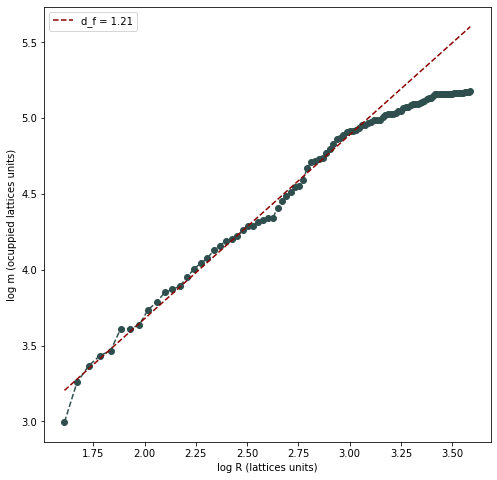

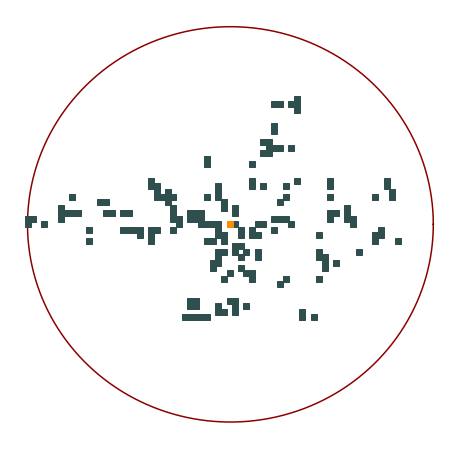

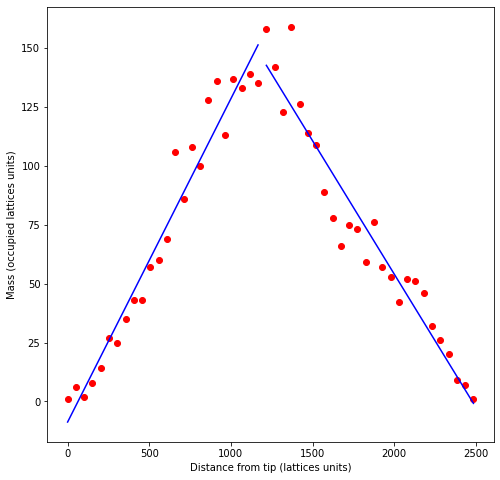

No arquivo ./files/particles/n_mode_1_0.dat
37.61389243240545
massa: 199.000000
Area: 4444.740692
Densidade 4.48
[[1.57622149]] [0.53740161]


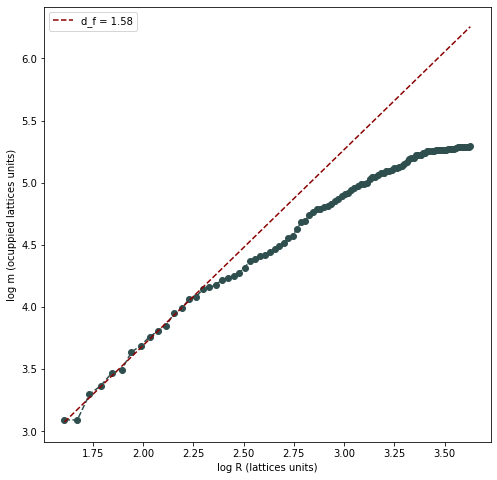

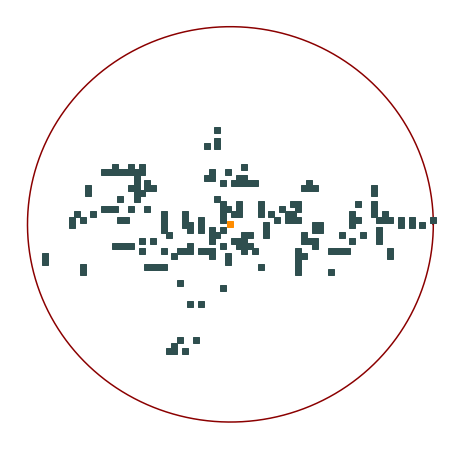

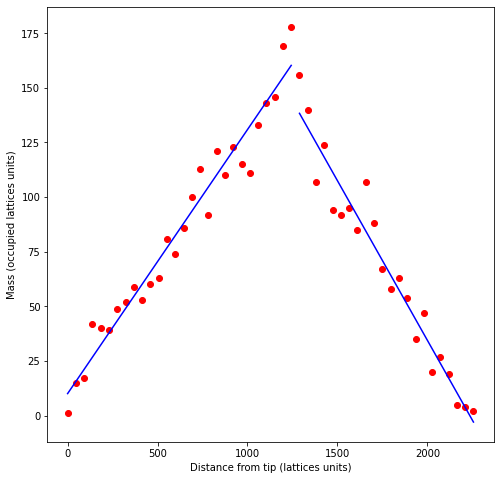

No arquivo ./files/particles/n_mode_1_1.dat
36.253172155681504
massa: 170.000000
Area: 4128.971635
Densidade 4.12
[[2.08957858]] [-0.8673763]


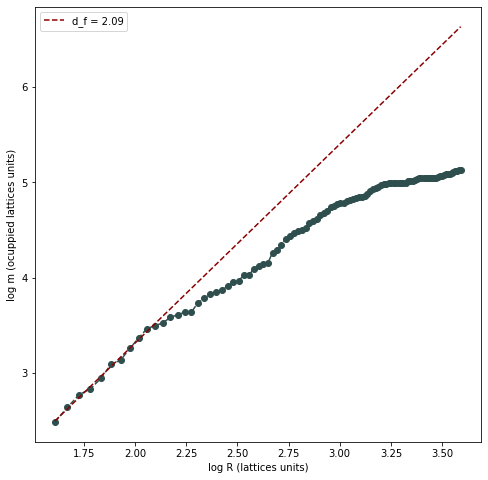

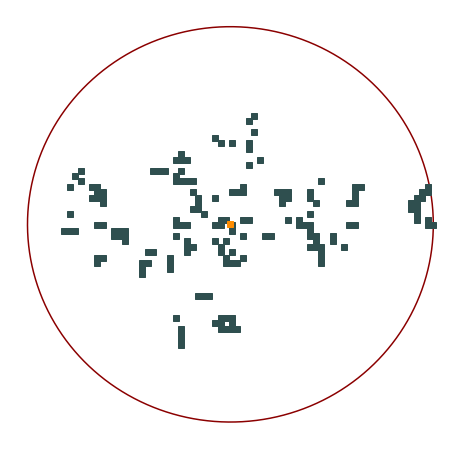

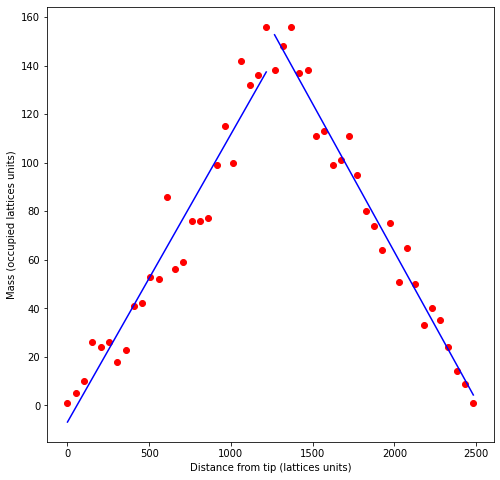

No arquivo ./files/particles/n_mode_1_2.dat
35.52299966340873
massa: 174.000000
Area: 3964.323949
Densidade 4.39
[[1.5909364]] [0.32188593]


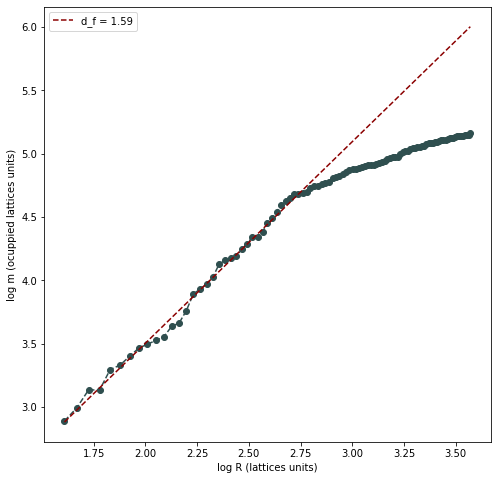

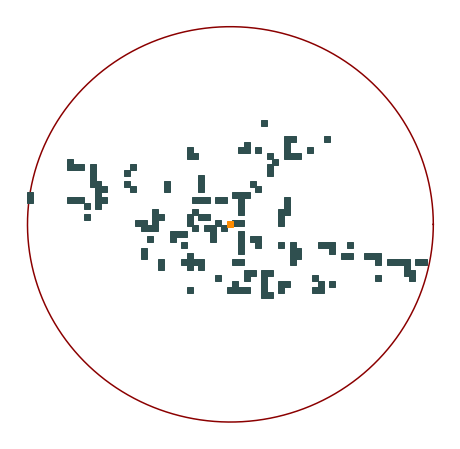

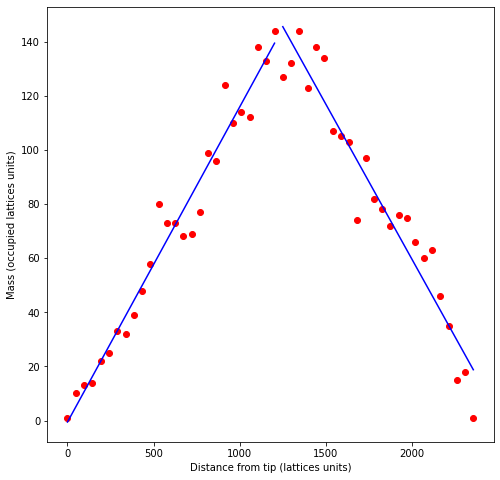

No arquivo ./files/particles/n_mode_1_3.dat
40.23699157265376
massa: 174.000000
Area: 5086.287172
Densidade 3.42
[[1.72902833]] [-0.22621702]


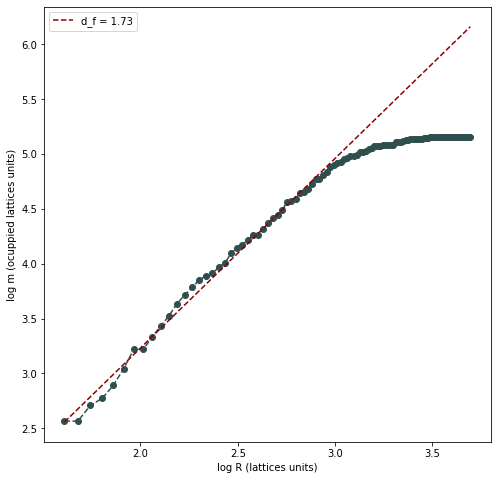

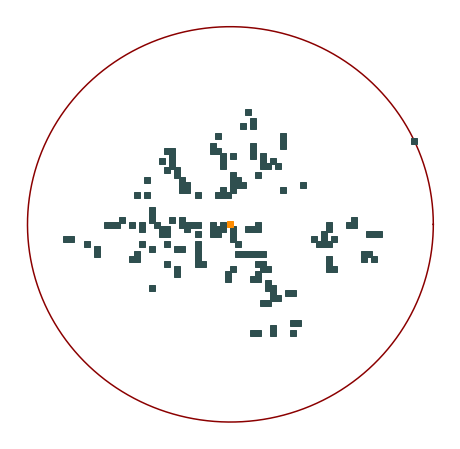

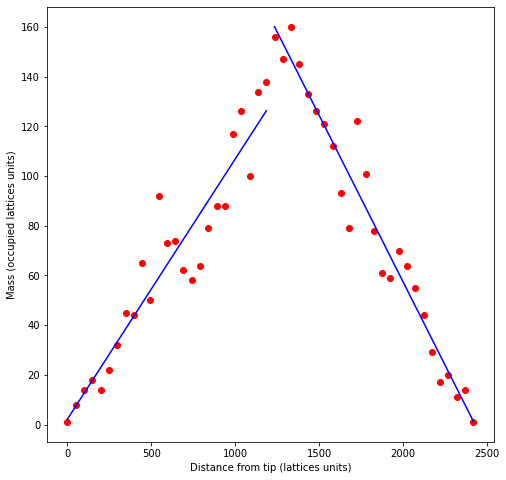

No arquivo ./files/particles/n_mode_1_4.dat
31.192298980544805
massa: 193.000000
Area: 3056.642467
Densidade 6.31
[[1.62966387]] [0.16841558]


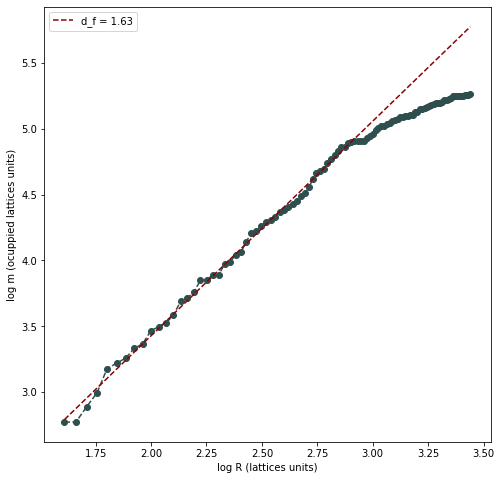

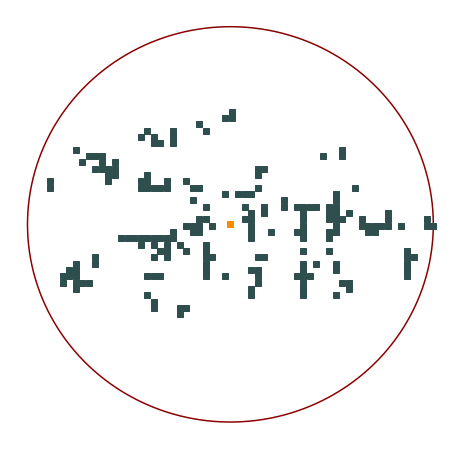

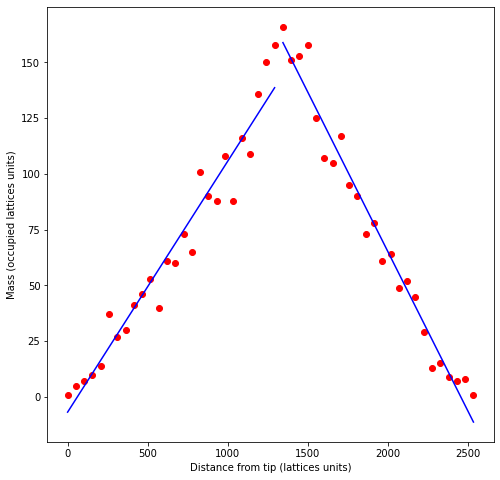

No arquivo ./files/particles/n_mode_10_0.dat
30.447384054964246
massa: 193.000000
Area: 2912.392093
Densidade 6.63
[[1.36746258]] [0.84479]


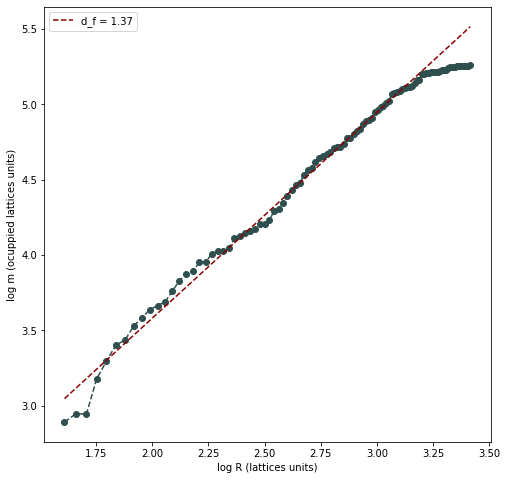

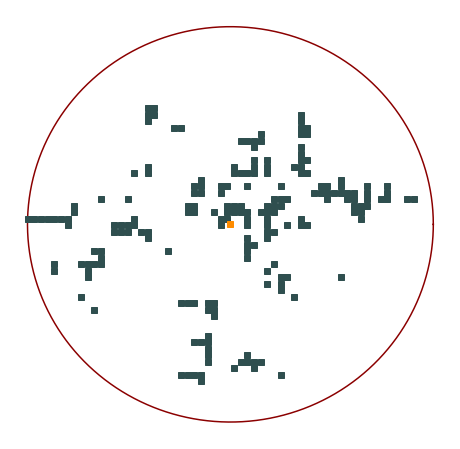

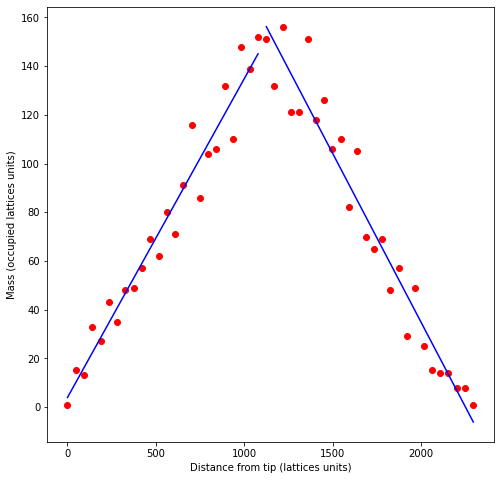

No arquivo ./files/particles/n_mode_10_1.dat
28.880815222034045
massa: 170.000000
Area: 2620.407107
Densidade 6.49
[[1.68101557]] [0.10507892]


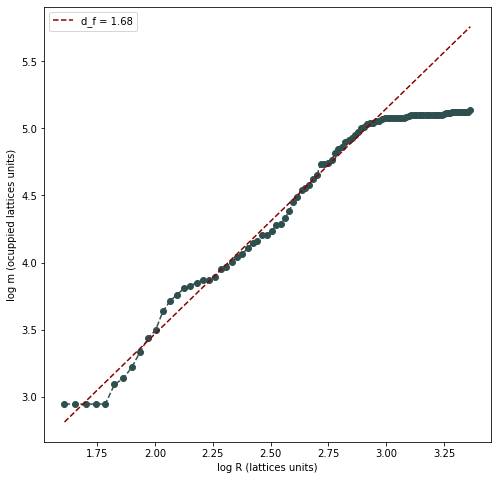

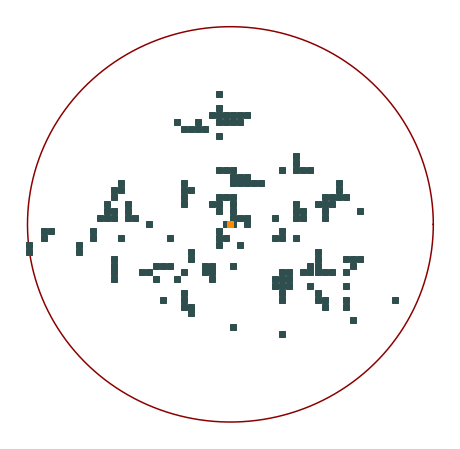

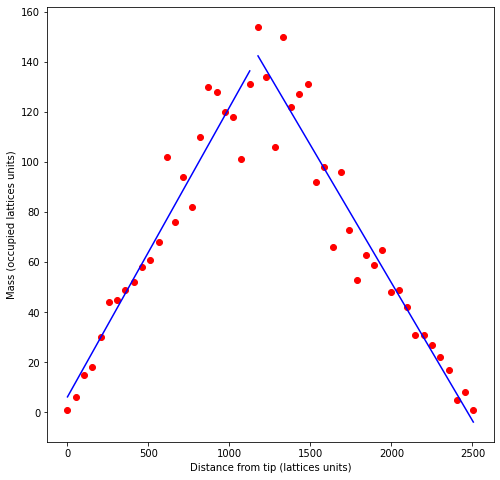

No arquivo ./files/particles/n_mode_10_2.dat
28.32222041838681
massa: 177.000000
Area: 2520.022796
Densidade 7.02
[[2.67534264]] [-1.82469237]


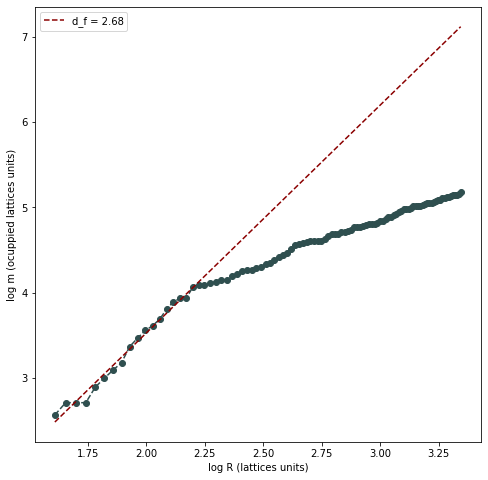

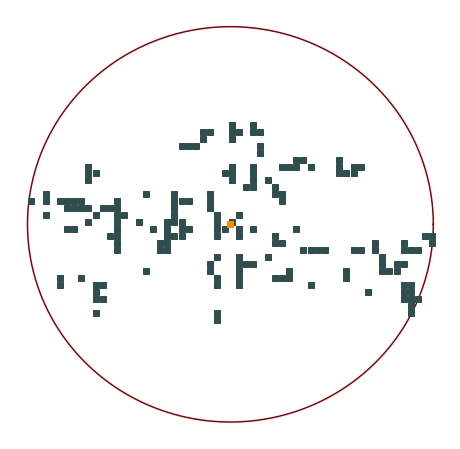

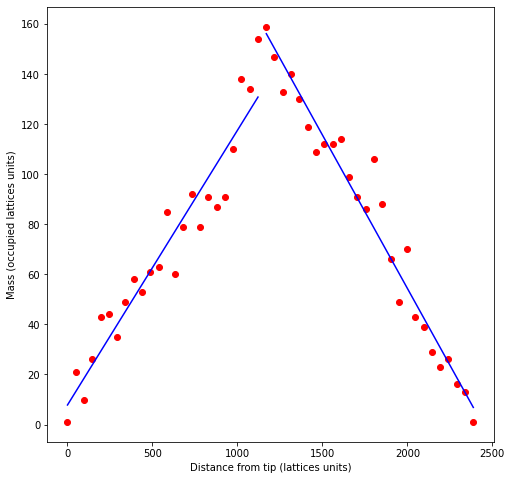

No arquivo ./files/particles/n_mode_10_3.dat
33.49559711164583
massa: 201.000000
Area: 3524.725667
Densidade 5.70
[[1.52807729]] [0.41873962]


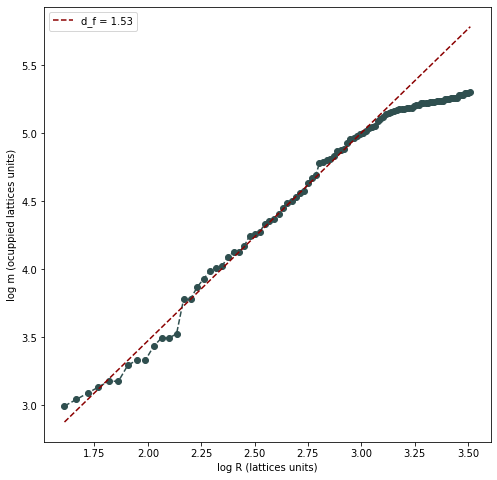

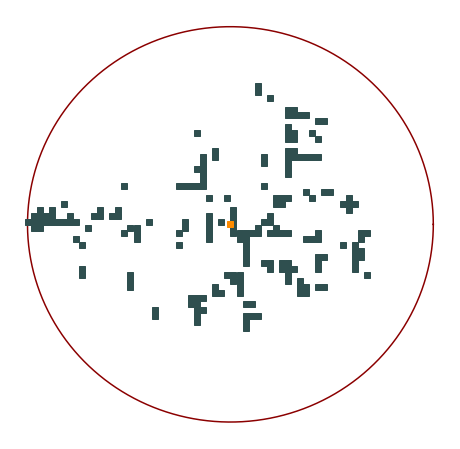

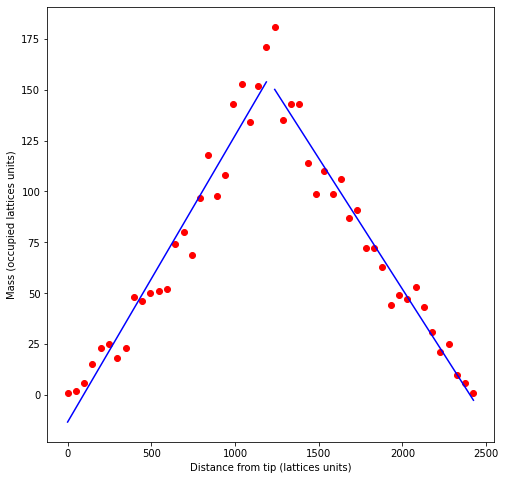

No arquivo ./files/particles/n_mode_10_4.dat
45.46777717403219
massa: 232.000000
Area: 6494.673433
Densidade 3.57
[[1.62968364]] [0.66091039]


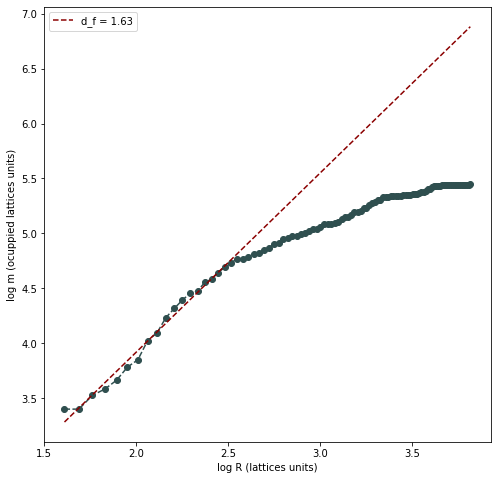

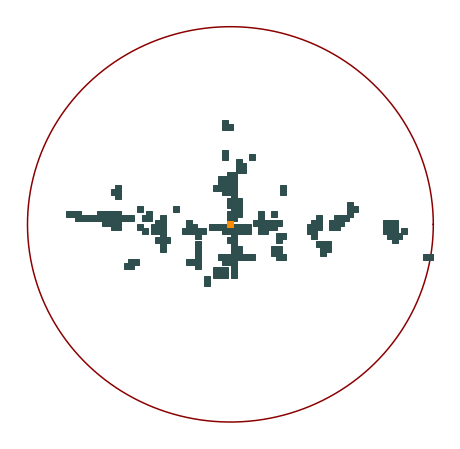

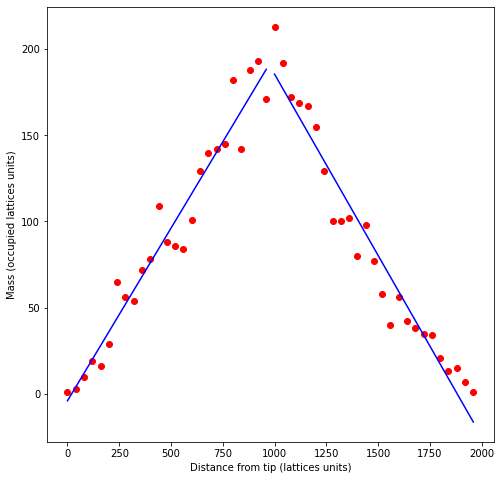

No arquivo ./files/particles/n_mode_100_0.dat
34.238989389969184
massa: 265.000000
Area: 3682.915440
Densidade 7.20
[[1.67349475]] [0.5295651]


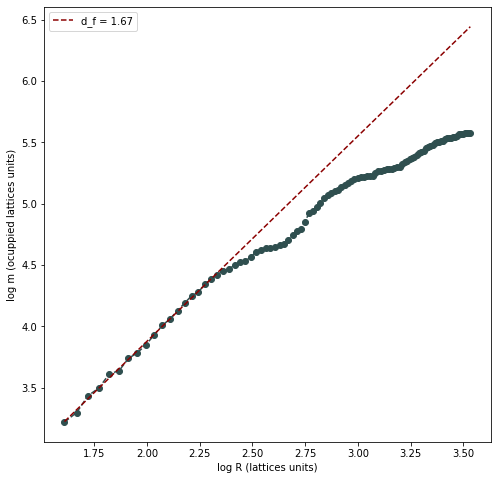

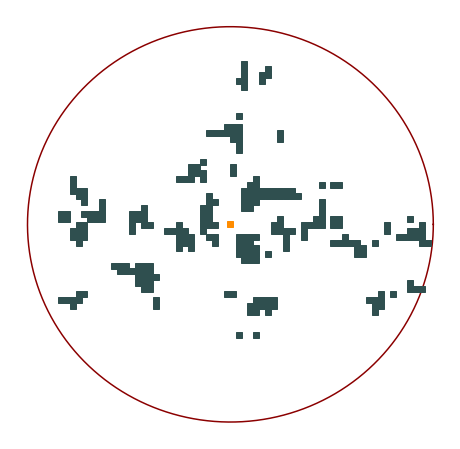

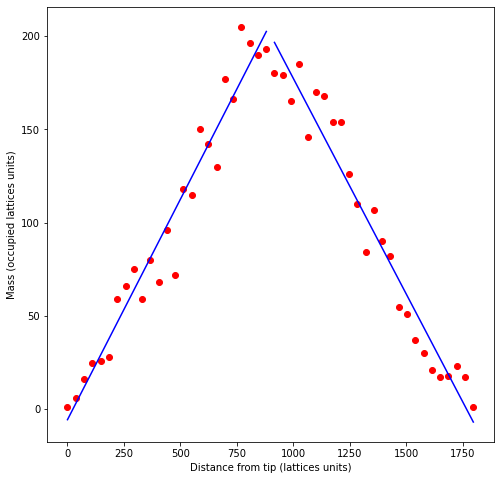

No arquivo ./files/particles/n_mode_100_1.dat
41.373242041773736
massa: 224.000000
Area: 5377.606010
Densidade 4.17
[[1.9602548]] [-0.32484845]


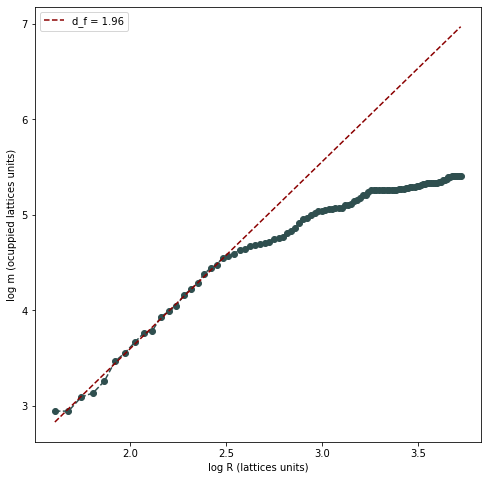

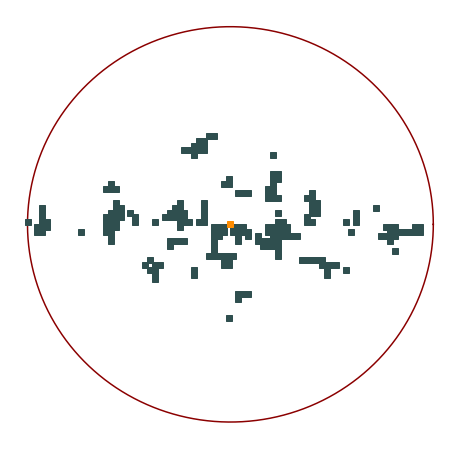

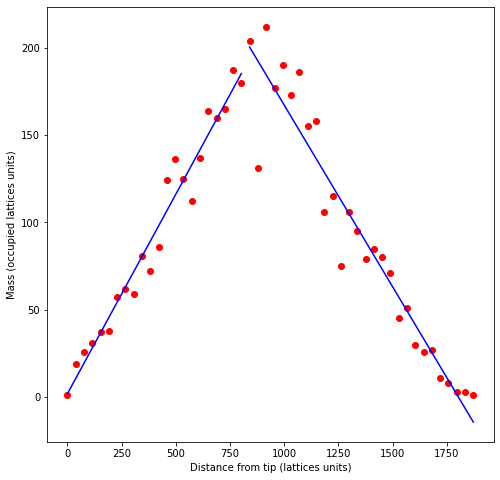

No arquivo ./files/particles/n_mode_100_2.dat
40.994125995594786
massa: 247.000000
Area: 5279.504153
Densidade 4.68
[[1.30916108]] [1.34376084]


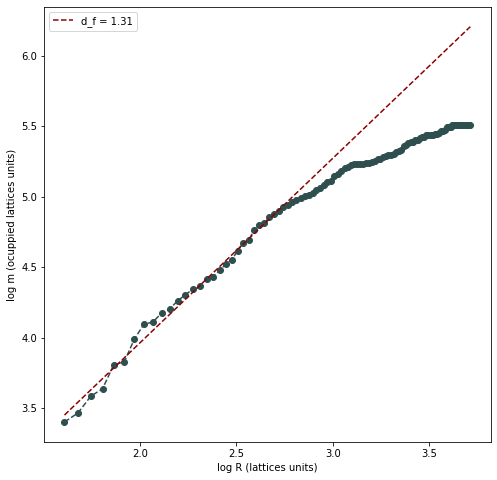

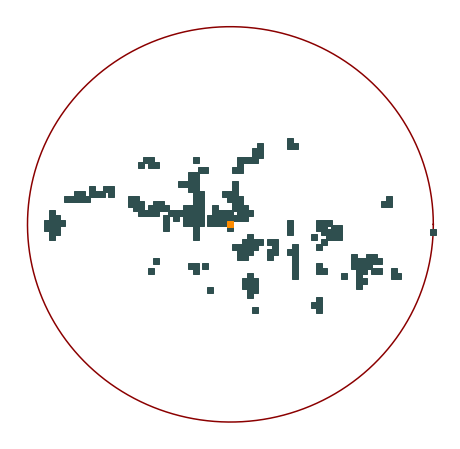

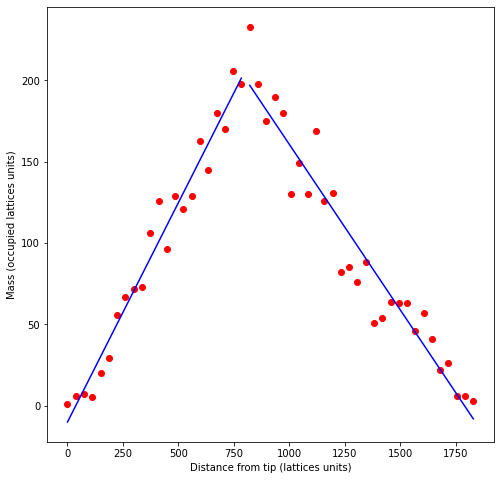

No arquivo ./files/particles/n_mode_100_3.dat
37.32540997035421
massa: 272.000000
Area: 4376.823624
Densidade 6.21
[[1.43715111]] [0.97116703]


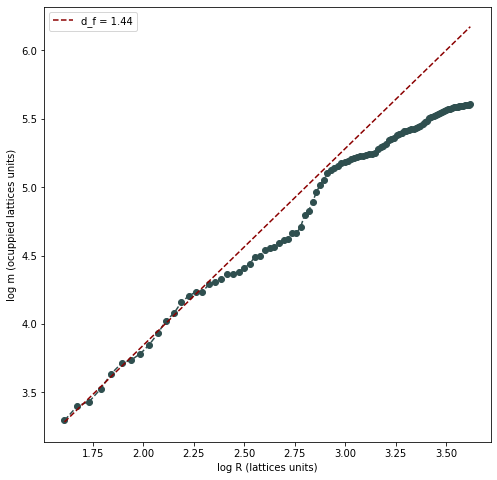

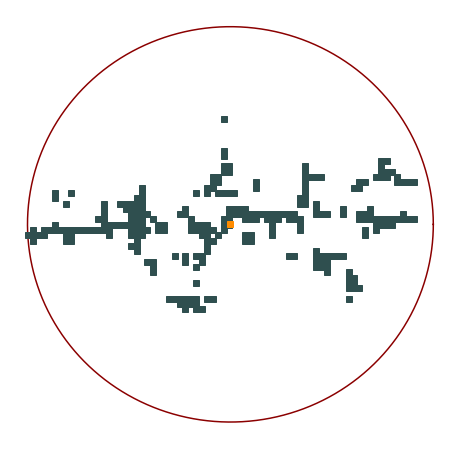

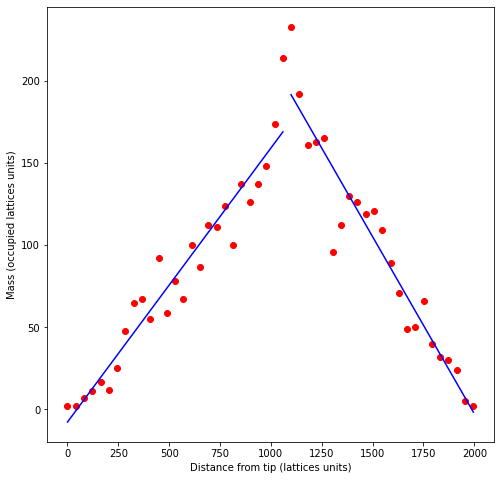

No arquivo ./files/particles/n_mode_100_4.dat
67.44465294005212
massa: 700.000000
Area: 14290.417633
Densidade 4.90
[[1.47213884]] [0.91912438]


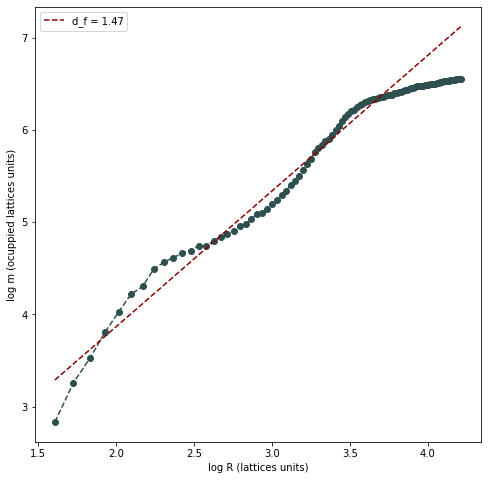

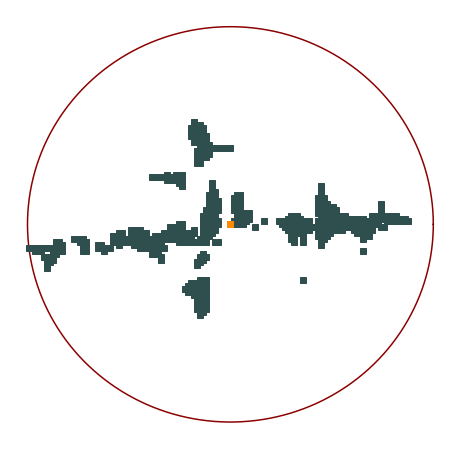

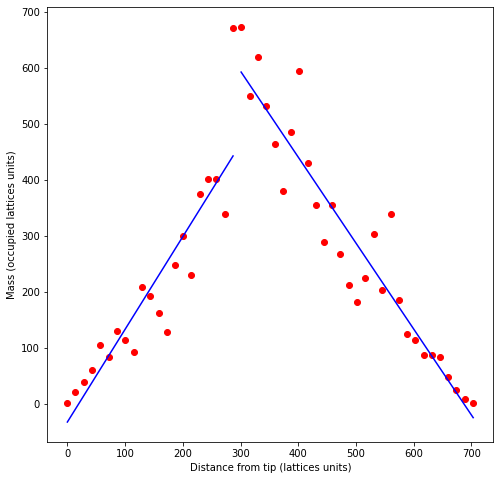

No arquivo ./files/particles/n_mode_1000_0.dat
55.887458938238105
massa: 935.000000
Area: 9812.475836
Densidade 9.53
[[1.34410932]] [1.59718758]


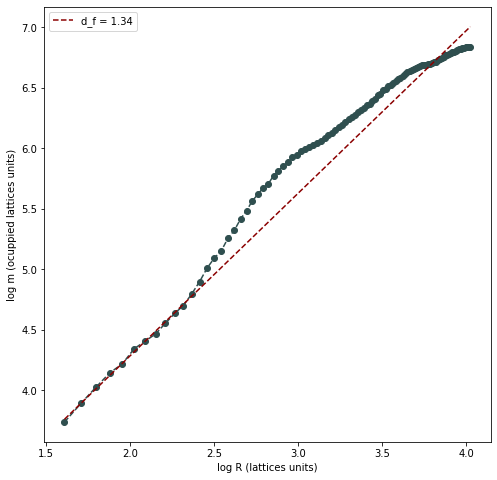

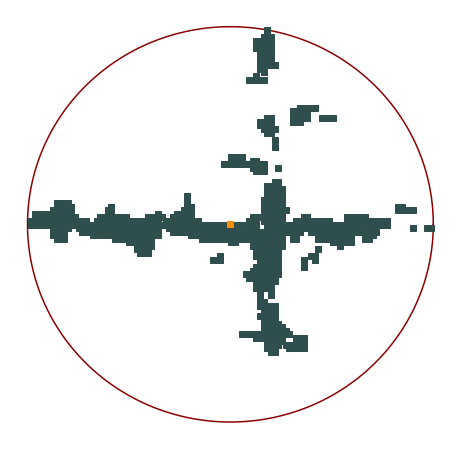

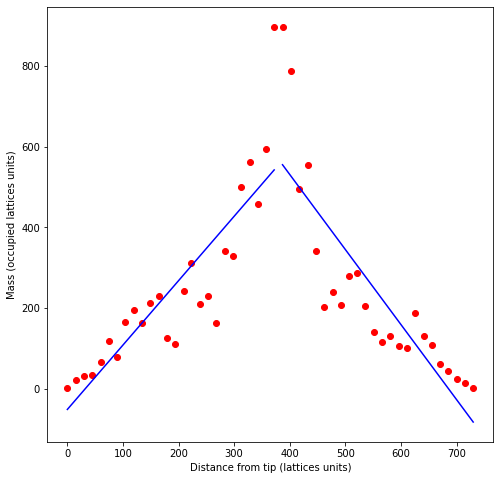

No arquivo ./files/particles/n_mode_1000_1.dat
65.84240425935855
massa: 971.000000
Area: 13619.502211
Densidade 7.13
[[1.46708973]] [1.60235045]


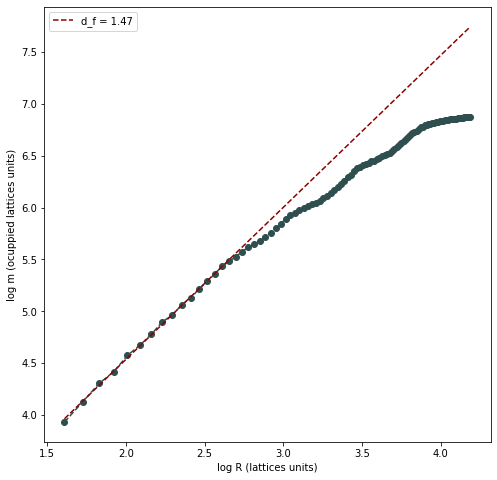

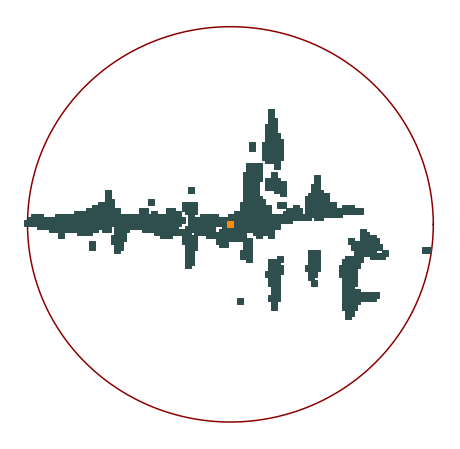

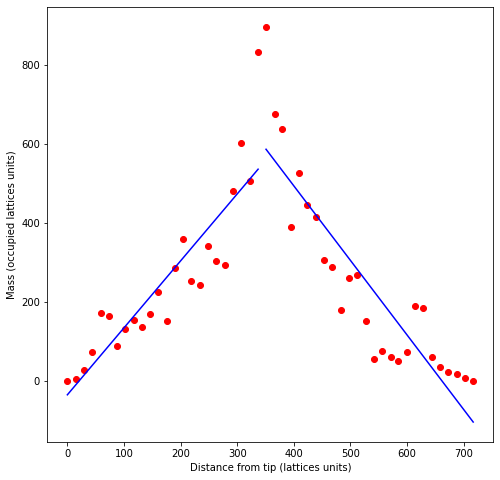

No arquivo ./files/particles/n_mode_1000_2.dat
56.43095048213053
massa: 767.000000
Area: 10004.251550
Densidade 7.67
[[1.38949259]] [1.60129688]


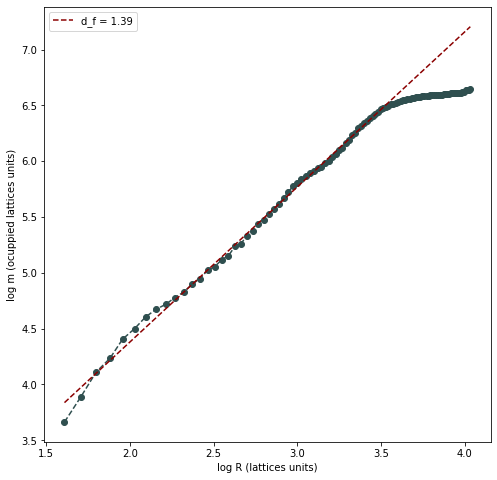

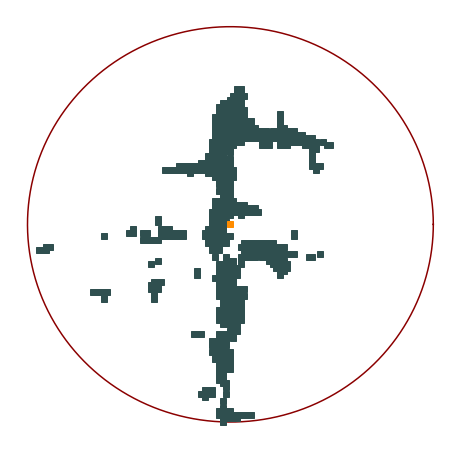

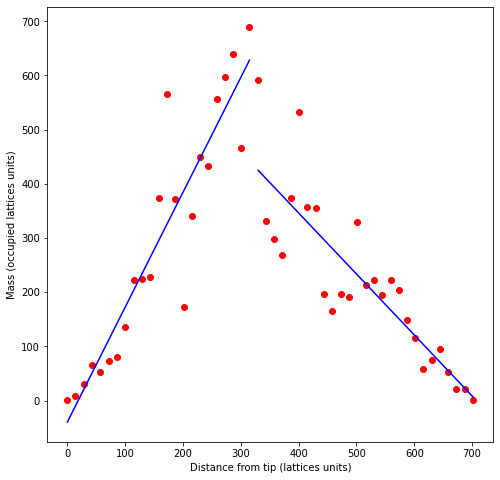

No arquivo ./files/particles/n_mode_1000_3.dat
82.74518601719726
massa: 1285.000000
Area: 21509.749166
Densidade 5.97
[[1.18222191]] [2.4308625]


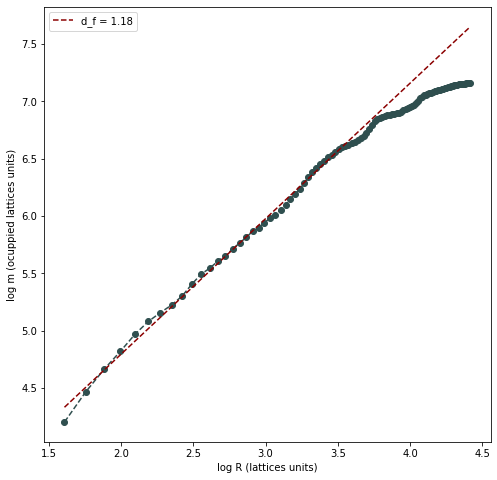

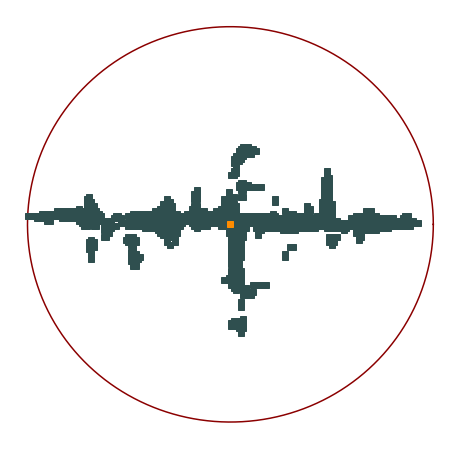

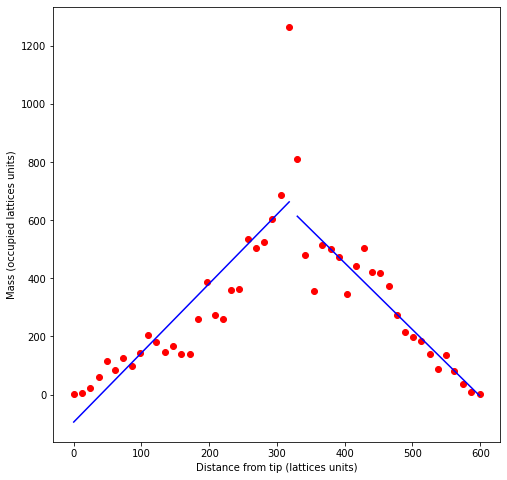

No arquivo ./files/particles/n_mode_1000_4.dat


In [326]:
num = 50
c = 0
L, R , D, F, I = [], [], [], [], 1

for i in range(0,4):
    for j in range(0,5):

        arquivo_ = ('./files/particles/n_mode_%d_%d.dat' %(I,j))
        yt, counts, max, length = mass_center(arquivo_)
        x, z, xc, zc, radius = transversal_section (arquivo_, max)
        df, densidade = fractal(radius,x,z,xc,zc,arquivo_)
        mass_per_length(yt,counts,max, num)
    
        if c < 5: 
            print("No arquivo %s" %arquivo_)
            with open("./files/data/ teste.txt", "a") as fid:
                fid.write("%s\n" % arquivo_)
                fid.write("\n")
                fid.write("Length ........ %d\n" %length)
                fid.write("Radius ........ %d\n" %radius)
                fid.write("Density ....... %.2f\n" %densidade)
                fid.write("Fractal dim ... %.2f\n" %df)

            L.append(length)
            R.append(radius)
            D.append(round(densidade, 2))
            F.append(round(df, 2))
            c+= 1

        if c == 5:

            mL = sum(L)/len(L)
            mR = sum(R)/len(R)
            mD = sum(D)/len(D)
            mF = sum(F)/len(F)

            with open("./files/data/ teste.txt", "a") as fid:
                fid.write("\n")
                fid.write("AVERAGE %s\n" % arquivo_)
                fid.write("\n")
                fid.write("<Length> ........ %d\n" %mL)
                fid.write("<Radius> ........ %d\n" %mR)
                fid.write("<Density> ....... %.2f\n" %mD)
                fid.write("<Fractal dim> ... %.2f\n" %mF)
                fid.write("\n")

            c = 0

    I = I *10


In [ ]:


def media(arquivo):
    y = []
    with open(arquivo) as fid:
        for row in fid.readlines():
            row = row.split()
            y.append( int(row[3]))
    y = np.array(y)
    y_,counts = np.unique(y,return_counts=True)
    #print(y_)
    #print(counts)
    yt_,countts = sortear(y_,counts)
    max = yt_[0]
    maior = y_[counts==np.max(counts)][0]
    lenght = np.abs(np.max(y) - np.min(y))
    #print(max)
    return maior,lenght,y_, counts, max

def sortear(x,counts):
    sor = counts.argsort()
    counts = counts[sor[::-1]]
    x = x[sor[::-1]]
    return x,counts

def secao(med,leght,arquivo):
    #print(med)
    plt.figure(figsize = (8,8))
    #print("legth: %d" %leght)
    x = []
    z = []

    with open(arquivo) as fid:
        for row in fid.readlines():
            row = row.split()
            y = int(row[3])

            if y == med:
                x.append(int(row[2]))
                z.append(int(row[4]))
                plt.plot(int(row[2]), int(row[4]),'rs')
    
    
    #plt.show()
    return x,z

def Raio(x,z):
    x = np.array(x)
    z = np.array(z)
    xcent = np.mean(x)
    zcent = np.mean(z)
    centro = np.array([xcent,zcent]*len(x)).reshape(-1,2)
    pontos = np.vstack([np.array(x),np.array(z)]).T
    distancia = np.sqrt(np.sum((centro-pontos)*(centro-pontos),axis = 1))
    r = np.max(distancia)
    return r,xcent,zcent

def fractal(r,x,z,xcent,zcent,arquivo):
    ## frac dimension 
    n = 100
    radius = np.linspace(5,r,n)
    cont = np.zeros(n)
    for j in range(0,len(radius)):
        c = 0
        for i in range(0,len(x)):
            ri = m.sqrt(((x[i]-xcent) **2) + ((z[i]-zcent)**2))
            if ri <= radius[j]:
                c += 1
                cont[j] = c
    #r = 0
    occup = float(len(x))
    A = float(np.pi*(r**2))
    densitty = float(occup/A * 100)
    print("massa: %f" % occup)
    print("Area: %f" %A)
    print("Densidade %.2f" % densitty)
    print(r)
    vmin = np.log(radius[0])
    vmax = np.log(radius[-1])
    radius = np.log(radius).reshape(-1,1)
    cont = np.log(cont).reshape(-1,1)
    j, R = 0, 0
    for i in range(10,len(radius)):
        reg = LinearRegression().fit(radius[:i], cont[:i])
        r2 = reg.score(radius[:i], cont[:i])
        if(r2>R):     
            R = r2
            j = i
        #Y = reg.coef_*v[:i] + reg.intercept_
    reg = LinearRegression().fit(radius[:j], cont[:j])
    print(reg.coef_,reg.intercept_)
    #print(v[-1][0])
    Y = reg.coef_*np.array([vmin,vmax]) + reg.intercept_
    plt.figure(figsize = (8,8))
    plt.plot(radius, cont, 'o--',color='darkslategray')
    plt.xlabel('log R (lattices units)')
    plt.ylabel('log m (ocuppied lattices units)')
    plt.plot(np.linspace(vmin,vmax,2000), Y[0], '--',color='darkred', label = "d_f = {:.2f}".format(reg.coef_[0][0]))
    plt.legend()
    plt.savefig("./img/"+arquivo[18:-3] + 'jpg', dpi=400)
    #plt.show()

    theta = np.linspace(0,2*np.pi,2000)
    x_ = xcent+r*np.cos(theta)
    y_ = zcent+r*np.sin(theta)

    plt.figure(figsize=(8,8))
    #plt.grid()
    plt.plot([xcent],[zcent],'s',color='darkorange',zorder = 5,label = 'Centro') # Centro
    plt.plot(x,z,'s',color='darkslategray',zorder = 1,label = 'Dados') # Dados
    plt.plot(x_,y_,color = 'darkred',zorder = 0,label = 'Circuferência')
    #plt.legend()
    plt.axis('off')
    plt.savefig("img/"+arquivo[18:-4]+"_fractal.jpg", dpi=400)
    #plt.show()

    return reg.coef_[0][0], densitty

def mass_legth(yt,counts,max, num):
    plt.figure(figsize = (8,8))
    yleft = []
    yright = []
    xleft = []
    xright = []
    #print(yt)

    idx = np.round(np.linspace(0, len(yt) - 1, num)).astype(int)


    for j in idx:

        #print(type(int(j)))
        plt.plot(yt[int(j)] - np.min(yt), counts[int(j)], 'ro', zorder = 1)
        #print(yt[j] - min(yt))
        #print(counts[j])

        if yt[j] > max:
            yright.append(counts[j])
            xright.append(yt[j] - np.min(yt))

        else:
            yleft.append(counts[j])
            xleft.append(yt[j] - np.min(yt))
        

    #plt.xlim(0,2200)
    #plt.ylim(0,210)

    ## Lado esquerdo 
    yleft=np.array(yleft)
    xleft=np.array(xleft)
    xleft = xleft.reshape(-1,1)
    yleft = yleft.reshape(-1,1)


    ## Lado direito
    yright=np.array(yright)
    xright=np.array(xright)
    xright = xright.reshape(-1,1)
    yright = yright.reshape(-1,1)


    reg = LinearRegression().fit(xleft, yleft)
    #print(reg.coef_,reg.intercept_)
    #print(v[-1][0])
    Y = reg.coef_*np.linspace(np.min(xleft),np.max(xleft),len(xleft)) + reg.intercept_
    Y = Y[0]
    plt.plot(np.linspace(np.min(xleft),np.max(xleft),len(xleft)), Y, 'b-', zorder = 5)

    reg = LinearRegression().fit(xright, yright)
    #print(reg.coef_,reg.intercept_)
    #print(v[-1][0])
    Yy = reg.coef_*np.linspace(np.min(xright),np.max(xright),len(xright)) + reg.intercept_
    Yy = Yy[0]
    plt.plot(np.linspace(np.min(xright),np.max(xright),len(xright)), Yy, 'b-', zorder = 5)
    plt.xlabel('Distance from tip (lattices units)')
    plt.ylabel('Mass (occupied lattices units)')
    plt.show()



In [ ]:
arquivos_dla = [i for i in listdir('./files/') if i[-3:] =='dat']

#sarquivos_dla = []
#for i in arquivos_dla:
    #sarquivos_dla.append(sorted( filter( os.path.isfile,glob.glob('./files/'+i) ) ))
a = [len(i) for i in arquivos_dla]
print(arquivos_dla)




In [ ]:
print(name_)
for i in name_:
    create_mode(i)

In [ ]:
print(arquivos_dla[:5])

##for arquivo in arquivos_dla:
##    create_mode(arquivo)

create_mode(name_)
print(name_)

In [ ]:
arquivos_mode = [i for i in listdir('./files/particles/') if i[-3:] =='dat']
print(arquivos_mode)

In [ ]:
num = 50
c = 0
L = []
R = []
D = []
F = []
I = 1
for i in range(0,4):
    for j in range(0,5):

        
        
        arquivo_ = ('./files/particles/n_mode_%d_%d.dat' %(I,j))
        med,length, yt, counts, max = media(arquivo_)
        x, z = secao(med,length, arquivo_)
        r,xcent,zcent = Raio(x,z)
        df, densidade = fractal(r,x,z,xcent,zcent,arquivo_)
        mass_legth(yt,counts,max, num)
    
        if c < 5: 
            print("No arquivo %s" %arquivo_)
            with open("./files/data/ teste.txt", "a") as fid:
                fid.write("%s\n" % arquivo_)
                fid.write("\n")
                fid.write("Length ........ %d\n" %length)
                fid.write("Radius ........ %d\n" %r)
                fid.write("Density ....... %.2f\n" %densidade)
                fid.write("Fractal dim ... %.2f\n" %df)

            L.append(length)
            R.append(r)
            D.append(round(densidade, 2))
            F.append(round(df, 2))
            c+= 1

        if c == 5:

            mL = sum(L)/len(L)
            mR = sum(R)/len(R)
            mD = sum(D)/len(D)
            mF = sum(F)/len(F)

            with open("./files/data/ teste.txt", "a") as fid:
                fid.write("\n")
                fid.write("AVERAGE %s\n" % arquivo_)
                fid.write("\n")
                fid.write("<Length> ........ %d\n" %mL)
                fid.write("<Radius> ........ %d\n" %mR)
                fid.write("<Density> ....... %.2f\n" %mD)
                fid.write("<Fractal dim> ... %.2f\n" %mF)
                fid.write("\n")

            c = 0

    I = I *10


In [ ]:
num = 50
plt.figure(figsize = (8,8))
yleft = []
yright = []
xleft = []
xright = []
#print(yt)

idx = np.round(np.linspace(0, len(yt) - 1, num)).astype(int)


for j in idx:

    #print(type(int(j)))
    plt.plot(yt[int(j)] - np.min(yt), counts[int(j)], 'ro', zorder = 1)
    #print(yt[j] - min(yt))
    #print(counts[j])

    if yt[j] > max:
        yright.append(counts[j])
        xright.append(yt[j] - np.min(yt))

    else:
        yleft.append(counts[j])
        xleft.append(yt[j] - np.min(yt))
    

#plt.xlim(0,2200)
#plt.ylim(0,210)

## Lado esquerdo 
yleft=np.array(yleft)
xleft=np.array(xleft)
xleft = xleft.reshape(-1,1)
yleft = yleft.reshape(-1,1)


## Lado direito
yright=np.array(yright)
xright=np.array(xright)
xright = xright.reshape(-1,1)
yright = yright.reshape(-1,1)


reg = LinearRegression().fit(xleft, yleft)
print(reg.coef_,reg.intercept_)
#print(v[-1][0])
Y = reg.coef_*np.linspace(np.min(xleft),np.max(xleft),len(xleft)) + reg.intercept_
Y = Y[0]
plt.plot(np.linspace(np.min(xleft),np.max(xleft),len(xleft)), Y, 'b-', zorder = 5)

reg = LinearRegression().fit(xright, yright)
print(reg.coef_,reg.intercept_)
#print(v[-1][0])
Yy = reg.coef_*np.linspace(np.min(xright),np.max(xright),len(xright)) + reg.intercept_
Yy = Yy[0]
plt.plot(np.linspace(np.min(xright),np.max(xright),len(xright)), Yy, 'b-', zorder = 5)
plt.xlabel('Distance from tip (lattices units)')
plt.ylabel('Mass (occupied lattices units)')
plt.show()



In [ ]:
print(type(yt))

In [ ]:
#print(yleft)

print("criou") 
    if yt[t] > yt[0]:
        yright.append(counts[t])
        xright.append(yt[t] - min(yt))

    else:
        yleft.append(counts[t])
        xleft.append(yt[t] - min(yt))

#print(xleft)

## Lado esquerdo 
yleft=np.array(yleft)
xleft=np.array(xleft)
xleft = xleft.reshape(-1,1)
yleft = yleft.reshape(-1,1)


## Lado direito
yright=np.array(yright)
xright=np.array(xright)
xright = xright.reshape(-1,1)
yright = yright.reshape(-1,1)


reg = LinearRegression().fit(xleft, yleft)
print(reg.coef_,reg.intercept_)
#print(v[-1][0])
Y = reg.coef_*np.linspace(min(xleft),max(xleft),len(xleft)) + reg.intercept_
plt.plot(np.linspace(min(xleft),max(xleft),len(xleft)), Y, 'b-', zorder = 5)

reg = LinearRegression().fit(xright, yright)
print(reg.coef_,reg.intercept_)
#print(v[-1][0])
Y = reg.coef_*np.linspace(min(xright),max(xright),len(xright)) + reg.intercept_
plt.plot(np.linspace(min(xright),max(xright),len(xright)), Y, 'b-', zorder = 5)
plt.show()

In [ ]:
yt.reshape(37,-1)